# Machine Learning Algorithms

 Multiple Linear Regression with Python 

In [1]:
from datetime import datetime
local_dt = datetime.now()
print(local_dt)


2023-02-12 21:33:32.041214


In [3]:
import calendar
yy = 2023
mm =2
print('\n')
print(calendar.month(yy,mm))
print('The calender for this year is:')
print(calendar.calendar(2023))




   February 2023
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28

The calender for this year is:
                                  2023

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                   1             1  2  3  4  5             1  2  3  4  5
 2  3  4  5  6  7  8       6  7  8  9 10 11 12       6  7  8  9 10 11 12
 9 10 11 12 13 14 15      13 14 15 16 17 18 19      13 14 15 16 17 18 19
16 17 18 19 20 21 22      20 21 22 23 24 25 26      20 21 22 23 24 25 26
23 24 25 26 27 28 29      27 28                     27 28 29 30 31
30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                1  2       1  2  3  4  5  6  7                1  2  3  4
 3  4  5  6  7  8  9       8  9 10 11 12 13 14       5  6  7  8  9 10 11
10 11 12 1

# Implementing Multiple Linear Regression 

Object: Is to predict the profit made by a startup on the basis of expenses incurred and the state where they operate.

In [6]:
#Importing the libraries 

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt 
%matplotlib inline
 

In [7]:
from datetime import datetime
time = datetime.now()
print(time)


2023-02-12 21:34:10.733883


In [8]:
# Importing Dataset
dataset = pd.read_csv(r'/mnt/d/DATA_SCIENCE/1000cos/simplilearn1000.csv')

In [9]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
dataset.count

<bound method DataFrame.count of      R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20      136897.800      471784.1000    New York  192261.83000
1    162597.70      151377.590      443898.5300  California  191792.06000
2    153441.51      101145.550      407934.5400     Florida  191050.39000
3    144372.41      118671.850      383199.6200    New York  182901.99000
4    142107.34       91391.770      366168.4200     Florida  166187.94000
..         ...             ...              ...         ...           ...
995   54135.00      118451.999      173232.6695  California   95279.96251
996  134970.00      130390.080      329204.0228  California  164336.60550
997  100275.47      241926.310      227142.8200  California  413956.48000
998  128456.23      321652.140      281692.3200  California  333962.19000
999  161181.72      270939.860      295442.1700    New York  476485.43000

[1000 rows x 5 columns]>

In [11]:
len(dataset)

1000

In [12]:
dataset.shape

(1000, 5)

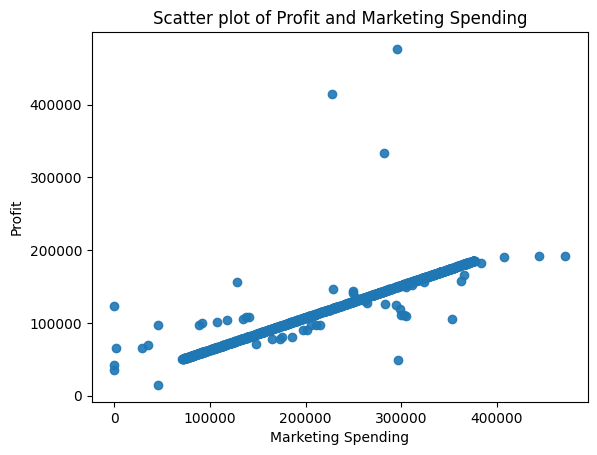

In [14]:
# Scatter plot between Marketing and Profit

plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.9)
plt.title('Scatter plot of Profit and Marketing Spending')
plt.xlabel('Marketing Spending')
plt.ylabel('Profit')
plt.show()

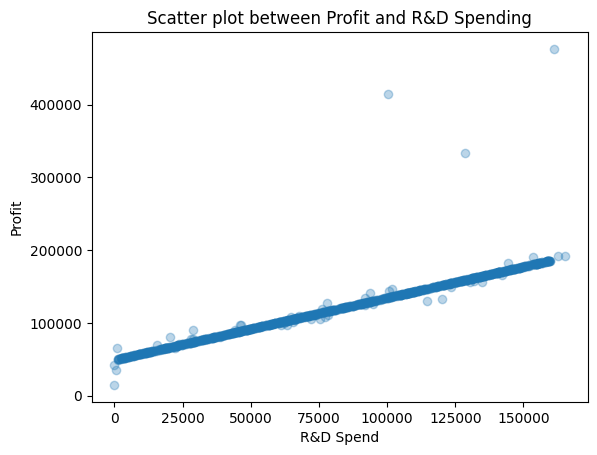

In [16]:
# Scatter plot between R&D Spending vs Profiit

plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.3)
plt.title('Scatter plot between Profit and R&D Spending')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()



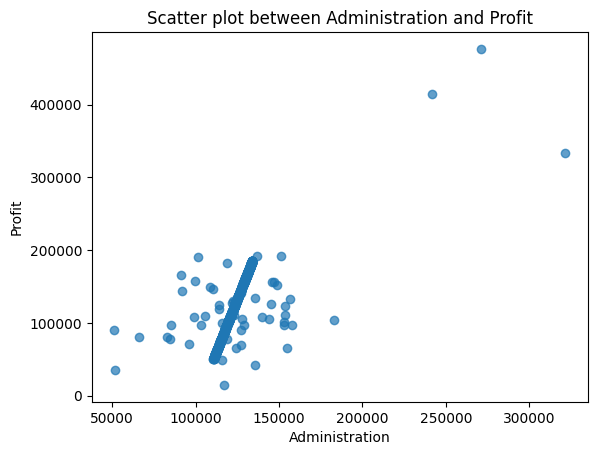

In [18]:
# Scatter plot between Administration and Profit

plt.scatter(dataset['Administration'],dataset['Profit'], alpha=0.7)
plt.title('Scatter plot between Administration and Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()



Text(0, 0.5, 'Profit')

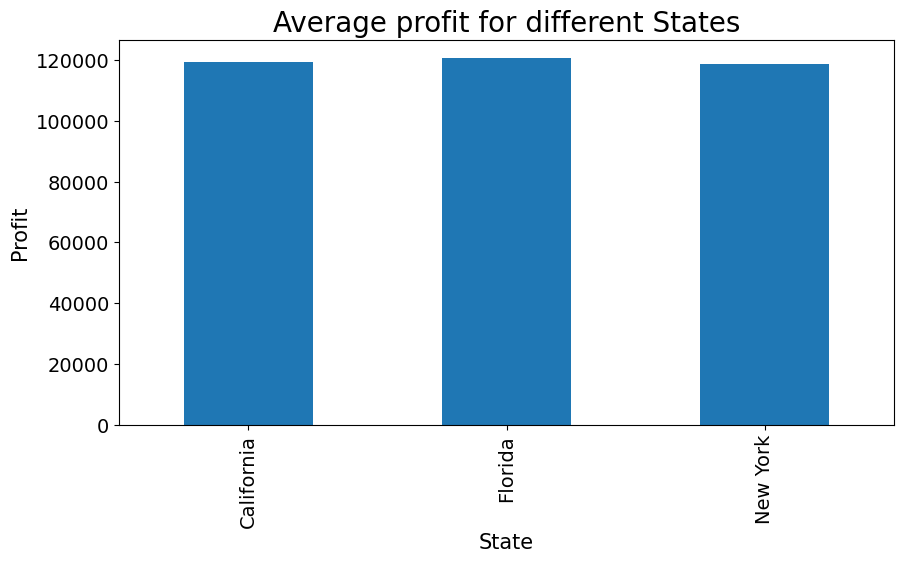

In [20]:
# Creating a figure object

au = dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize = (10,5) ,fontsize = 14)

# Set the title
au.set_title('Average profit for different States', fontsize =20)

#set x and y labels

au.set_xlabel('State', fontsize = 15)
au.set_ylabel('Profit', fontsize = 15)

In [21]:
dataset.State.value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [24]:
# Creating dummy variables for the catergorical varibles State

dataset['NewYork_State'] = np.where(dataset['State'] == 'New York', 1,0)
dataset['Californa_State'] = np.where(dataset['State'] == 'California', 1,0)
dataset['Florida_State'] = np.where(dataset['State'] == 'Florida', 1,0)

#Drop the original column State form the dataframe
dataset.drop(columns= ['State'], axis=1,inplace=True)




In [25]:
dataset.head()


,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,Californa_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [26]:
dataset.tail()


,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,Californa_State,Florida_State
995,54135.00,118451.999,173232.6695,95279.96251,0,1,0
996,134970.00,130390.080,329204.0228,164336.60550,0,1,0
997,100275.47,241926.310,227142.8200,413956.48000,0,1,0
998,128456.23,321652.140,281692.3200,333962.19000,0,1,0
999,161181.72,270939.860,295442.1700,476485.43000,1,0,0


In [27]:
dependent_variable = 'Profit'


In [28]:
# Creating a list of independent variables
independent_variables = dataset.columns.tolist()


In [29]:
independent_variables.remove(dependent_variable)

In [30]:

independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'Californa_State',
 'Florida_State']

In [32]:
# create data of independent variables
x = dataset[independent_variables].values

# create data for dependent variable
y = dataset[dependent_variable].values

In [38]:
# Splitting dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0) 


In [39]:
# Transformating data
scaler = MinMaxScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
X_train[0:3]

array([[0.23214506, 0.23983085, 0.30277197, 0.        , 1.        ,
        0.        ],
       [0.759665  , 0.28747605, 0.6595048 , 0.        , 0.        ,
        1.        ],
       [0.61277587, 0.27420914, 0.56017173, 0.        , 1.        ,
        0.        ]])

In [41]:
dataset.max()

R&D Spend          165349.20
Administration     321652.14
Marketing Spend    471784.10
Profit             476485.43
NewYork_State           1.00
Californa_State         1.00
Florida_State           1.00
dtype: float64

In [43]:
dataset.min()

R&D Spend              0.00
Administration     51283.14
Marketing Spend        0.00
Profit             14681.40
NewYork_State          0.00
Californa_State        0.00
Florida_State          0.00
dtype: float64

In [51]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train) 



LinearRegression()

In [52]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [53]:
math.sqrt(mean_squared_error(y_test,y_pred))


13861.748151480786

In [54]:
r2_score(y_test,y_pred)

0.9112695892268796